# Into the world of JAX

## What is JAX?

[JAX](https://github.com/google/jax) is the library which is for machine learning or numeric calculation in multiple dimensions with matrix. It is now currently actively developed by Google, for the research purpose of its team like [Google-research](https://github.com/n2cholas/awesome-jax) or [Deepmind](https://www.deepmind.com/blog/using-jax-to-accelerate-our-research).
JAX is different from [Tensorflow](https://www.tensorflow.org/) or [PyTorch](https://pytorch.org/), which are introduced as 'deep-learning library'. 

JAX has some differences in:

- JAX is stateless, not like Tensorflow or PyTorch
- JIT(Just-In-Time Compile) is only for puristic functions.
- It is easy to parallelize via using pmap or vmap

Remember, JAX is not compatible with fully abstractized level deep learning programming, but only for its atomic operations like automatic differentiation and matrix(or tensor) calculations with multiple devices like GPUs or TPUs. If you want to code deep neural networks in easy manner, then try to use PyTorch, Tensorflow, [dm-haiku](https://github.com/deepmind/dm-haiku) or [flax](https://github.com/google/flax).

## Features of JAX

### grad

jax.grad gives you the derivative of the functions. Let's try to run under below code.

In [4]:
from jax import grad
from jax import numpy as np

def f(x):
    return x ** 2

df = grad(f)

x = float(input("input any number you want"))

print(f(x)) # original function
print(df(x)) # first derivative

input any number you want 13


169.0
26.0


In [18]:
from jax import grad
from jax import numpy as np

def f(x):
    return x ** 2

df = grad(f)

x = np.arange(0, 10, dtype=np.float32) 

print(np.array([f(n) for n in x])) # original function
print(np.array([df(n) for n in x])) # first derivative

[ 0.  1.  4.  9. 16. 25. 36. 49. 64. 81.]
[ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18.]


now try to see the graphical form of the original function and derivative function. 

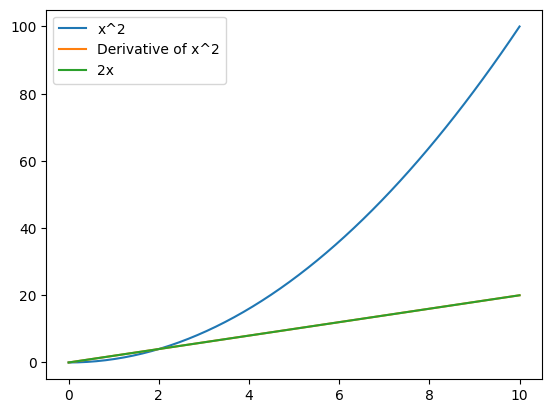

In [19]:
import matplotlib.pyplot as plt

# pre-calculated derivative of x^2

def g(x):
    return 2 * x


x = np.linspace(start=0, stop=10)


plt.plot(x, np.array([f(n) for n in x]), label='x^2')
plt.plot(x, np.array([df(n) for n in x]), label='Derivative of x^2')
plt.plot(x, np.array([g(n) for n in x]), label='2x')
plt.legend()

## vmap

In above, we run the function as lambda form, but it is quite bothering stuff to make. So I has tried to run with vector form.
But if you run this function with vector as input like ```np.arange(0, 10, dtype=np.float32)```, it will throw an error. 


In [23]:
x = np.arange(0, 10, dtype=np.float32) 

print(f(x)) # original function
print(df(x)) # first derivative, error will occur

[ 0.  1.  4.  9. 16. 25. 36. 49. 64. 81.]


TypeError: Gradient only defined for scalar-output functions. Output had shape: (10,).

```jax.grad``` function only supports the scalar output. This is the reason why you should use ```jax.vmap``` on vectorised form.

In [24]:
from jax import vmap # for calculating in vectorised form

df_vect = vmap(df)
x = np.arange(0, 10, dtype=np.float32) 

print(f(x)) # original function
print(df_vect(x)) # first derivative, vectorised form

[ 0.  1.  4.  9. 16. 25. 36. 49. 64. 81.]
[ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18.]


It works! vmap is not only for calculating the grad function as vectorised, but it can be applied into multiple functions needed to be vectorised like matrix multiplication. 

## JIT(Just-In-Time compile)
Just In time compilation will allow huge increases of calculation speed. Let's check!

In [35]:
from jax import jit

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

sigmoid_jit = jit(sigmoid)

x = np.linspace(-1, 1, 1000000, dtype=np.float32)

%timeit -r 10 sigmoid(x)
%timeit -r 10 sigmoid_jit(x)


2.89 ms ± 816 µs per loop (mean ± std. dev. of 10 runs, 1,000 loops each)
617 µs ± 107 µs per loop (mean ± std. dev. of 10 runs, 1,000 loops each)


It shows almost 4x faster performance! will be continued ...

### Copyright

Copyright 2023, Dongyeong Kim

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.